In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv("data/ER_Aquatic Sediment.xlsx - ER.csv", index_col= False)
df.head()

,Cr,Mn,Fe,Co,Ni,Cu,Zn,As,Pb
0,0,0.615,2.7621,0.2576,0,0.000,1.748,0.0,0.0
1,0,0.755,2.1681,MDL,0,0.000,1.889,0.0,0.0
2,0,0.486,2.7810,0.3036,0,0.000,1.031,0.0,0.0
3,0,0.498,2.4300,0.2806,0,11.120,1.711,0.0,0.0
4,0,0.836,2.9916,0.3358,0,8.835,0.668,0.0,0.0


In [88]:
df.describe()

,Cr,Mn,Fe,Ni,Cu,Zn,As,Pb
count,20.0,20.000000,20.000000,20.0,20.000000,20.00000,20.000000,20.000000
mean,0.0,0.614900,2.668545,0.0,0.997750,1.34175,2.320000,0.144500
std,0.0,0.175592,0.262173,0.0,3.093299,0.57159,6.544853,0.360022
min,0.0,0.322000,2.168100,0.0,0.000000,0.66800,0.000000,0.000000
25%,0.0,0.486000,2.524500,0.0,0.000000,0.96075,0.000000,0.000000
50%,0.0,0.577000,2.748600,0.0,0.000000,1.18100,0.000000,0.000000
75%,0.0,0.755250,2.789100,0.0,0.000000,1.72025,0.000000,0.000000
max,0.0,0.956000,3.134700,0.0,11.120000,2.80200,23.550000,1.210000


In [89]:
df.columns

Index(['Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'As', 'Pb'], dtype='object')

In [90]:
dt = df[['Mn', 'Fe', 'Co', 'Cu', 'Zn', 'As', 'Pb']]
dt.head()

,Mn,Fe,Co,Cu,Zn,As,Pb
0,0.615,2.7621,0.2576,0.000,1.748,0.0,0.0
1,0.755,2.1681,MDL,0.000,1.889,0.0,0.0
2,0.486,2.7810,0.3036,0.000,1.031,0.0,0.0
3,0.498,2.4300,0.2806,11.120,1.711,0.0,0.0
4,0.836,2.9916,0.3358,8.835,0.668,0.0,0.0


In [91]:
dt.describe()

,Mn,Fe,Cu,Zn,As,Pb
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,0.614900,2.668545,0.997750,1.34175,2.320000,0.144500
std,0.175592,0.262173,3.093299,0.57159,6.544853,0.360022
min,0.322000,2.168100,0.000000,0.66800,0.000000,0.000000
25%,0.486000,2.524500,0.000000,0.96075,0.000000,0.000000
50%,0.577000,2.748600,0.000000,1.18100,0.000000,0.000000
75%,0.755250,2.789100,0.000000,1.72025,0.000000,0.000000
max,0.956000,3.134700,11.120000,2.80200,23.550000,1.210000


In [92]:
np.random.seed(0)
num_samples = 10000  
metals = {
    'Mn': {'mean': dt.Mn.mean() , 'std_dev': dt.Mn.std()},
    'Fe': {'mean': dt.Fe.mean() , 'std_dev': dt.Fe.std()},
    'Cu': {'mean': dt.Cu.mean() , 'std_dev': dt.Cu.std()},
    'Zn': {'mean': dt.Zn.mean() , 'std_dev': dt.Zn.std()},
    'As': {'mean': dt.As.mean() , 'std_dev': dt.As.std()},
    'Pb': {'mean': dt.Pb.mean() , 'std_dev': dt.Pb.std()},
}

data = {}
for metal, params in metals.items():
    data[metal] = np.random.normal(params['mean'], params['std_dev'], num_samples)

df = pd.DataFrame(data)
df.describe()

,Mn,Fe,Cu,Zn,As,Pb
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.611663,2.671426,0.980233,1.340603,2.294766,0.146385
std,0.173416,0.260366,3.084945,0.576595,6.521360,0.359763
min,-0.041831,1.502756,-13.416880,-0.940587,-22.364699,-1.602367
25%,0.493793,2.499368,-1.081767,0.955294,-2.066228,-0.098896
50%,0.610146,2.669614,0.987271,1.348564,2.361905,0.144048
75%,0.728348,2.845880,3.042798,1.731437,6.746126,0.390467
max,1.282441,3.611926,12.850624,3.515990,24.832635,1.531310


In [93]:
df["RI"] = df.sum(axis=1)
df.head()

,Mn,Fe,Cu,Zn,As,Pb,RI
0,0.924653,2.615555,2.018681,1.553943,-10.373745,0.168276,-3.092637
1,0.685164,2.450094,0.996265,1.515961,7.155668,0.756530,13.559683
2,0.786758,3.123049,3.528427,1.629903,11.448006,-0.438453,20.077690
3,1.008383,2.718528,2.322343,1.419086,-3.004795,-0.070208,4.393337
4,0.942828,2.621928,-6.747709,1.715432,-3.039070,-0.617843,-5.124434


In [94]:
df.to_csv("data/MonteDataER.csv", index=False)

Statistical Summary:
                 Mn            Fe            Cu            Zn            As  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.611663      2.671426      0.980233      1.340603      2.294766   
std        0.173416      0.260366      3.084945      0.576595      6.521360   
min       -0.041831      1.502756    -13.416880     -0.940587    -22.364699   
25%        0.493793      2.499368     -1.081767      0.955294     -2.066228   
50%        0.610146      2.669614      0.987271      1.348564      2.361905   
75%        0.728348      2.845880      3.042798      1.731437      6.746126   
max        1.282441      3.611926     12.850624      3.515990     24.832635   

                 Pb            RI  
count  10000.000000  10000.000000  
mean       0.146385      8.045076  
std        0.359763      7.234283  
min       -1.602367    -22.036623  
25%       -0.098896      3.138266  
50%        0.144048      8.143135  
75%        0.39

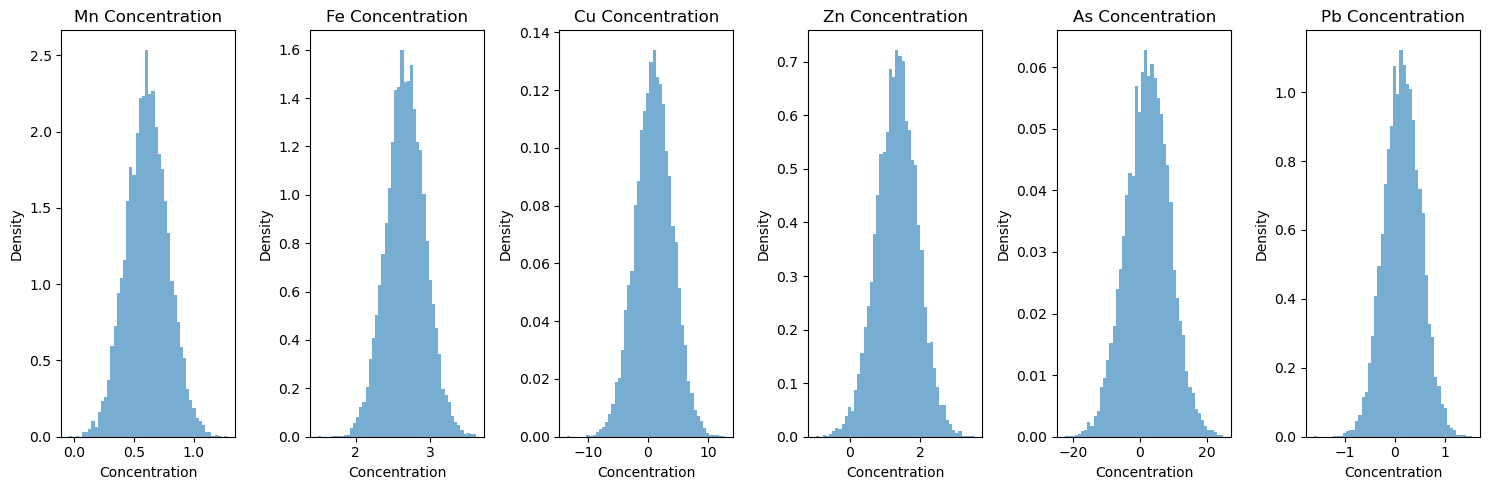

In [95]:
stats = df.describe()
print("Statistical Summary:")
print(stats)

fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i, metal in enumerate(metals.keys()):
    axes[i].hist(df[metal], bins=50, density=True, alpha=0.6)
    axes[i].set_title(f'{metal} Concentration')
    axes[i].set_xlabel('Concentration')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [96]:
data = {}
for metal, params in metals.items():
    mean_log = np.log(params['mean']**2 / np.sqrt(params['std_dev']**2 + params['mean']**2))
    sigma_log = np.sqrt(np.log(1 + (params['std_dev']**2 / params['mean']**2)))
    data[metal] = np.random.lognormal(mean_log, sigma_log, num_samples)

log_df = pd.DataFrame(data)
log_df.head()

,Mn,Fe,Cu,Zn,As,Pb
0,0.437264,2.212865,0.737276,1.295624,0.378665,0.221624
1,0.467050,3.132362,1.202808,2.528957,5.220272,0.006710
2,0.550090,2.464612,0.169137,1.190390,0.639516,0.014075
3,0.721718,2.697267,0.185336,0.882313,0.578088,0.118512
4,0.688887,2.586788,1.849103,0.669590,0.472359,0.029050


In [97]:
log_df["RI"] = log_df.sum(axis=1)
log_df.head()

,Mn,Fe,Cu,Zn,As,Pb,RI
0,0.437264,2.212865,0.737276,1.295624,0.378665,0.221624,5.283318
1,0.467050,3.132362,1.202808,2.528957,5.220272,0.006710,12.558159
2,0.550090,2.464612,0.169137,1.190390,0.639516,0.014075,5.027820
3,0.721718,2.697267,0.185336,0.882313,0.578088,0.118512,5.183233
4,0.688887,2.586788,1.849103,0.669590,0.472359,0.029050,6.295778


In [98]:
log_df.to_csv("data/MonteLogER.csv", index= False)

In [2]:
log_df = pd.read_csv("data/MonteLogER.csv")
log_df.describe()

,Mn,Fe,Cu,Zn,As,Pb,RI
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.612193,2.670850,1.020167,1.352025,2.441284,0.145503,8.242022
std,0.172612,0.261940,2.979900,0.576642,6.911400,0.401932,7.540062
min,0.211803,1.797969,0.000969,0.283836,0.002448,0.000222,3.449170
25%,0.488224,2.489999,0.110907,0.946424,0.286248,0.021211,5.452254
50%,0.589440,2.658424,0.311658,1.241890,0.790677,0.054564,6.478000
75%,0.709893,2.835812,0.887285,1.639484,2.112211,0.137989,8.441247
max,1.938932,3.811776,100.088487,6.373514,250.463348,22.226224,256.453743


In [99]:
norm_legend = ["Normal" for _ in range(0,10000)]
log_legend = ["Log Normal" for _ in range(0,10000)]

In [100]:
len(norm_legend)

10000

In [101]:
df["Legend"] = norm_legend
log_df["Legend"] = log_legend

In [102]:
df.head(), df.tail()

(         Mn        Fe        Cu        Zn         As        Pb         RI  \
 0  0.924653  2.615555  2.018681  1.553943 -10.373745  0.168276  -3.092637   
 1  0.685164  2.450094  0.996265  1.515961   7.155668  0.756530  13.559683   
 2  0.786758  3.123049  3.528427  1.629903  11.448006 -0.438453  20.077690   
 3  1.008383  2.718528  2.322343  1.419086  -3.004795 -0.070208   4.393337   
 4  0.942828  2.621928 -6.747709  1.715432  -3.039070 -0.617843  -5.124434   
 
    Legend  
 0  Normal  
 1  Normal  
 2  Normal  
 3  Normal  
 4  Normal  ,
             Mn        Fe        Cu        Zn         As        Pb         RI  \
 9995  0.297205  2.739768 -0.242347  0.508829  11.523470 -0.356944  14.469981   
 9996  0.622338  2.639969 -0.813228  2.491284  -8.940891  0.090636  -3.909893   
 9997  0.705659  2.653533 -3.677080  2.307656   0.681550  0.467072   3.138389   
 9998  0.609119  2.390921  4.019420  1.456049   6.146959 -0.617619  14.004850   
 9999  0.842838  2.582938  4.881389  0.641935 

In [103]:
norm_log = pd.concat([df, log_df])
norm_log.head()

,Mn,Fe,Cu,Zn,As,Pb,RI,Legend
0,0.924653,2.615555,2.018681,1.553943,-10.373745,0.168276,-3.092637,Normal
1,0.685164,2.450094,0.996265,1.515961,7.155668,0.756530,13.559683,Normal
2,0.786758,3.123049,3.528427,1.629903,11.448006,-0.438453,20.077690,Normal
3,1.008383,2.718528,2.322343,1.419086,-3.004795,-0.070208,4.393337,Normal
4,0.942828,2.621928,-6.747709,1.715432,-3.039070,-0.617843,-5.124434,Normal


In [104]:
norm_log.tail()

,Mn,Fe,Cu,Zn,As,Pb,RI,Legend
9995,0.538738,2.935202,0.510289,1.075384,9.275842,0.103052,14.438507,Log Normal
9996,0.511617,2.817404,0.246130,0.539124,1.715381,0.474710,6.304365,Log Normal
9997,0.480179,2.396343,0.769238,1.660540,2.228420,1.888913,9.423633,Log Normal
9998,0.659317,2.755119,4.979987,0.766196,0.396850,0.051188,9.608658,Log Normal
9999,0.617596,2.410813,0.193515,0.730336,21.229034,0.068657,25.249952,Log Normal


In [105]:
norm_log.describe()

,Mn,Fe,Cu,Zn,As,Pb,RI
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.611928,2.671138,1.000200,1.346314,2.368025,0.145944,8.143549
std,0.173010,0.261147,3.032867,0.576632,6.719442,0.381421,7.389226
min,-0.041831,1.502756,-13.416880,-0.940587,-22.364699,-1.602367,-22.036623
25%,0.490264,2.493713,0.053270,0.949247,0.155990,0.012115,5.112176
50%,0.600663,2.664013,0.422182,1.295325,1.064034,0.072729,6.836170
75%,0.719782,2.840913,1.920674,1.689947,4.416647,0.265863,10.658695
max,1.938932,3.811776,100.088487,6.373514,250.463348,22.226224,256.453743


In [106]:
norm_log.to_csv("data/MonteNormlog.csv", index=False)

In [121]:
for metal in metals.keys():
    log_df[f'{metal}'] = (log_df[f'{metal}'] / log_df["RI"]) * 100
log_df.head()

,Mn,Fe,Cu,Zn,As,Pb,RI,Legend,Mn%,Fe%,Cu%,Zn%,As%,Pb%
0,8.276312,41.884006,13.954798,24.522931,7.167174,4.194779,5.283318,Log Normal,8.276312,41.884006,13.954798,24.522931,7.167174,4.194779
1,3.719095,24.942840,9.577901,20.137962,41.568769,0.053433,12.558159,Log Normal,3.719095,24.942840,9.577901,20.137962,41.568769,0.053433
2,10.940926,49.019484,3.364027,23.676068,12.719553,0.279942,5.027820,Log Normal,10.940926,49.019484,3.364027,23.676068,12.719553,0.279942
3,13.924082,52.038308,3.575677,17.022446,11.153041,2.286446,5.183233,Log Normal,13.924082,52.038308,3.575677,17.022446,11.153041,2.286446
4,10.942047,41.087671,29.370530,10.635537,7.502794,0.461421,6.295778,Log Normal,10.942047,41.087671,29.370530,10.635537,7.502794,0.461421


In [122]:
percent = log_df[["Mn","Fe","Cu","Zn","As","Pb"]]
percent.describe()

,Mn,Fe,Cu,Zn,As,Pb
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.058384,39.682975,10.144118,19.442150,19.721679,1.950694
std,3.716922,12.798180,13.688567,8.667998,19.804667,3.676633
min,0.236639,1.151214,0.008036,0.201679,0.050667,0.001568
25%,6.442293,31.415406,1.669434,13.241330,4.918593,0.291696
50%,8.852547,41.201981,4.729190,18.744383,12.525820,0.778461
75%,11.398449,49.176370,12.570566,24.878466,28.115121,2.014389
max,26.117883,73.018176,95.077751,60.824470,97.664142,81.884148


In [123]:
percent.head()

,Mn,Fe,Cu,Zn,As,Pb
0,8.276312,41.884006,13.954798,24.522931,7.167174,4.194779
1,3.719095,24.942840,9.577901,20.137962,41.568769,0.053433
2,10.940926,49.019484,3.364027,23.676068,12.719553,0.279942
3,13.924082,52.038308,3.575677,17.022446,11.153041,2.286446
4,10.942047,41.087671,29.370530,10.635537,7.502794,0.461421


In [124]:
percent_sum = percent.mean(axis=0)
percent_sum.head()

Mn     9.058384
Fe    39.682975
Cu    10.144118
Zn    19.442150
As    19.721679
dtype: float64

In [125]:
sens = pd.DataFrame({
    "Metals" : percent_sum.index,
    "Values": percent_sum.values
})
sens.head()

,Metals,Values
0,Mn,9.058384
1,Fe,39.682975
2,Cu,10.144118
3,Zn,19.442150
4,As,19.721679


In [126]:
sens.to_csv("data/MonteSensitivity.csv")

In [115]:
percent_melt = percent.melt(value_name= "values")
percent_melt.head(10001)

,variable,values
0,Mn%,8.276312
1,Mn%,3.719095
2,Mn%,10.940926
3,Mn%,13.924082
4,Mn%,10.942047
...,...,...
9996,Mn%,8.115276
9997,Mn%,5.095478
9998,Mn%,6.861699
9999,Mn%,2.445930


In [116]:
percent_melt.to_csv("data/MontePercent.csv", index=False)